### About data set :
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

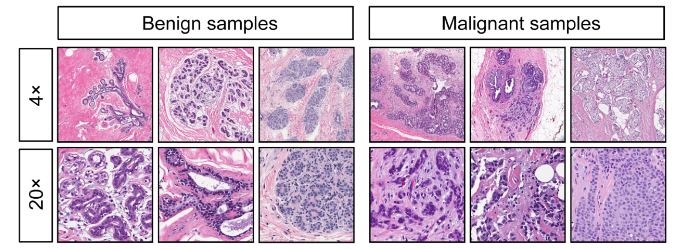

- Interestingly, several suspicious differences were found, thereby encouraging researchers to further understand what dominant features may affect the decision rule :

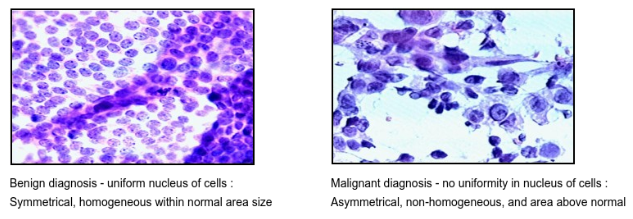

**This data set is taken from kaggle.**

### Problem Statement :
Predicting whether a breast mass is benign or malignant based on 30 features in the dataset. This prediction can be useful in diagnosing patients with suspected breast cancer.

### Importing libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
# to import a file into a pandas DataFrame
df = pd.read_csv('data.csv')

# to display the dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Insights of data set

 - **Checking the shape of the data set in the form of rows and columns**

In [3]:
df.shape

(569, 33)

 - There are **569 rows** and **33 columns**

 - **Viweing the columns available in our data set**

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

 - **Standardizing the column names for it's practicality**

In [5]:
# standardized column names will be meaninfull strings, lower cased and with '_' instead of 'spaces'
df.columns = [df.columns[i].lower().replace(' ','_') for i in range(len(df.columns))]

# Checking column names after standardization
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'unnamed:_32'],
      dtype='object')

 - **Checking for the number of Categorical and Numerical columns**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

 - There are total **569** entries.
 - There are **31 columns** with **floating** values.
 - There is **1** column with **integer** values.
 - There is **1** column with **categorical** values.

 - **Dropping columns which are less usefull for analysis**

In [7]:
# Creating a copy of original dataframe and dropping the unnecessary columns
df2 = df.drop(columns=['unnamed:_32', 'id'], axis=1)

# Reading the new data frame after dropping the columns
df2.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


 - **Chcking the shape of new data set after dropping the columns**

In [8]:
df2.shape

(569, 31)

 - There are **569 rows** and **31 columns** as we have dropped 2 columns.

 - **Checking the count of duplicate values**

In [9]:
df2.duplicated().sum().sum()

0

 - **Checking the count of null values**

In [10]:
df2.isnull().sum().sum()

0

 - There are no missing values in this dataset

 - **Statistical Measures about the data set**

In [11]:
df2.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


 - **Counting class labels of Target variable**

In [12]:
df2['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

 - **Replacing the diagnosis of malignant or benign with 1s and 0s respectively.**

In [13]:
df2['diagnosis'].replace({'M':1, 'B':0}, inplace = True) # it will change the data type of 'diagnosis' column to int

In [14]:
# Counting class labels of Target variable
df2['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [15]:
# Checking data frame after replacing target column values
df2.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
# Checking data-type of the 'diagnosis' column
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

 - **Checking correlation between the numerical columns**

In [17]:
a = round(df2.corr(),2)
a

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.00,0.73,0.42,0.74,0.71,0.36,0.60,0.70,0.78,0.33,...,0.78,0.46,0.78,0.73,0.42,0.59,0.66,0.79,0.42,0.32
radius_mean,0.73,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,...,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
texture_mean,0.42,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,...,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
perimeter_mean,0.74,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,...,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
area_mean,0.71,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,...,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
smoothness_mean,0.36,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,...,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
compactness_mean,0.60,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,...,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,0.70,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,...,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave_points_mean,0.78,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,...,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry_mean,0.33,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,...,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44


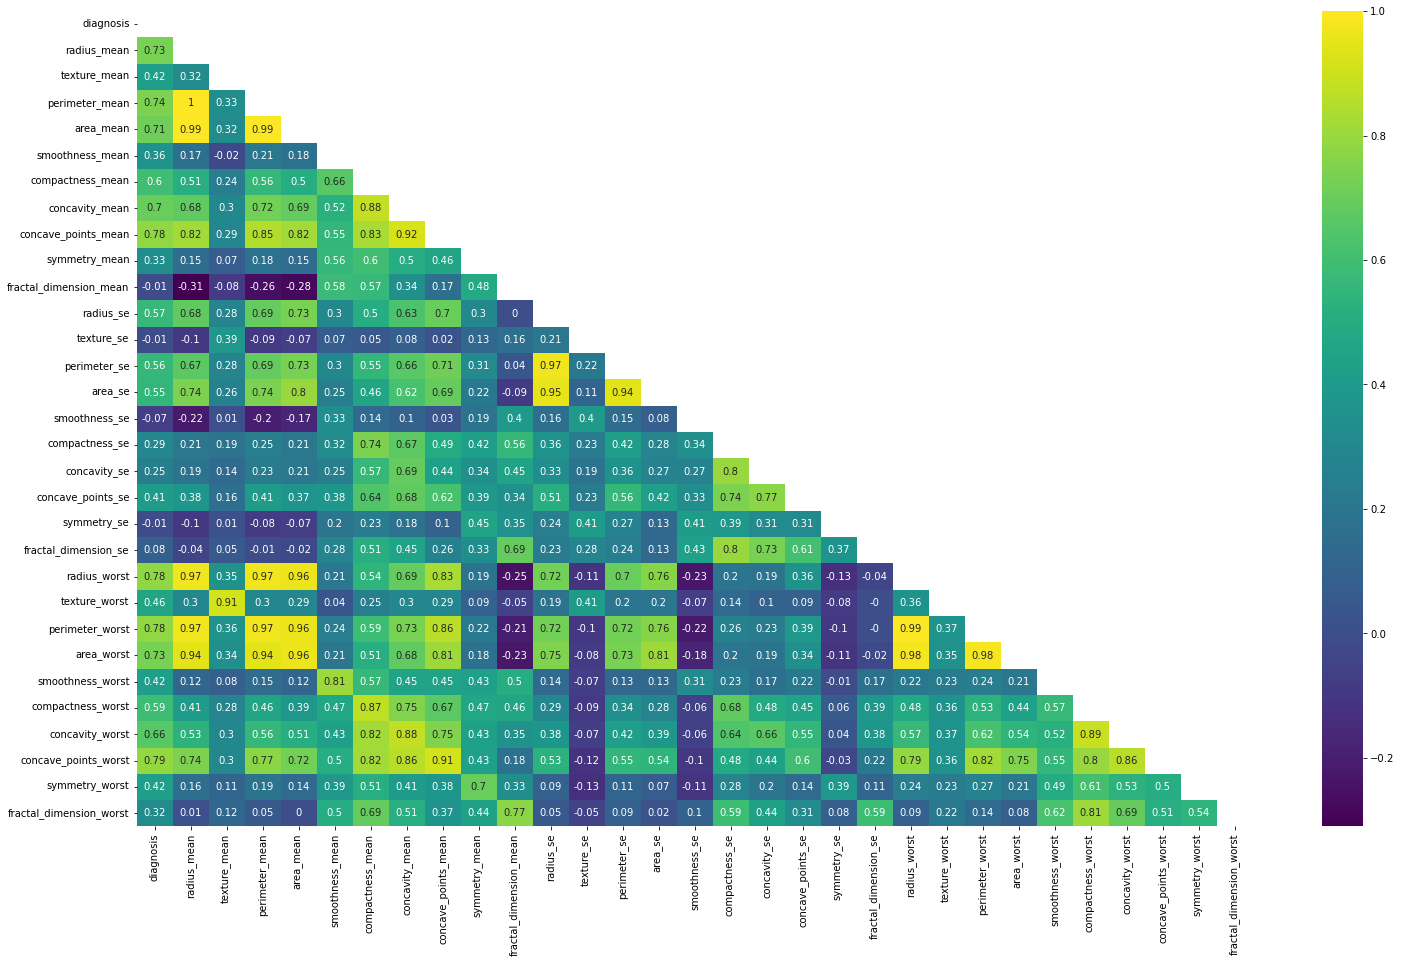

In [18]:
# visual view of correlation on nemerical columns
plt.figure(figsize=(25,15))
mask = np.zeros_like(a, dtype= bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(a, annot=True, mask=mask, cmap="viridis")
plt.show()

**Observation :** According to heatmap, removing the below columns from the data to avoid multicollinearity
 1. radius_mean 
 2. perimeter_mean 
 3. area_mean 
 4. radius_se
 5. perimeter_se
 6. radius_worst

In [19]:
# removing highly correlated columns

corr_matrix = df2.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.93)]

df2 = df2.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {df2.shape[1]} columns.")

The reduced dataframe has 24 columns.


In [20]:
# Checking correlation after removing highly correlated columns
a1 = round(df2.corr(),2)
a1

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.00,0.42,0.36,0.60,0.70,0.78,0.33,-0.01,-0.01,0.55,...,-0.01,0.08,0.46,0.73,0.42,0.59,0.66,0.79,0.42,0.32
texture_mean,0.42,1.00,-0.02,0.24,0.30,0.29,0.07,-0.08,0.39,0.26,...,0.01,0.05,0.91,0.34,0.08,0.28,0.30,0.30,0.11,0.12
smoothness_mean,0.36,-0.02,1.00,0.66,0.52,0.55,0.56,0.58,0.07,0.25,...,0.20,0.28,0.04,0.21,0.81,0.47,0.43,0.50,0.39,0.50
compactness_mean,0.60,0.24,0.66,1.00,0.88,0.83,0.60,0.57,0.05,0.46,...,0.23,0.51,0.25,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,0.70,0.30,0.52,0.88,1.00,0.92,0.50,0.34,0.08,0.62,...,0.18,0.45,0.30,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave_points_mean,0.78,0.29,0.55,0.83,0.92,1.00,0.46,0.17,0.02,0.69,...,0.10,0.26,0.29,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry_mean,0.33,0.07,0.56,0.60,0.50,0.46,1.00,0.48,0.13,0.22,...,0.45,0.33,0.09,0.18,0.43,0.47,0.43,0.43,0.70,0.44
fractal_dimension_mean,-0.01,-0.08,0.58,0.57,0.34,0.17,0.48,1.00,0.16,-0.09,...,0.35,0.69,-0.05,-0.23,0.50,0.46,0.35,0.18,0.33,0.77
texture_se,-0.01,0.39,0.07,0.05,0.08,0.02,0.13,0.16,1.00,0.11,...,0.41,0.28,0.41,-0.08,-0.07,-0.09,-0.07,-0.12,-0.13,-0.05
area_se,0.55,0.26,0.25,0.46,0.62,0.69,0.22,-0.09,0.11,1.00,...,0.13,0.13,0.20,0.81,0.13,0.28,0.39,0.54,0.07,0.02


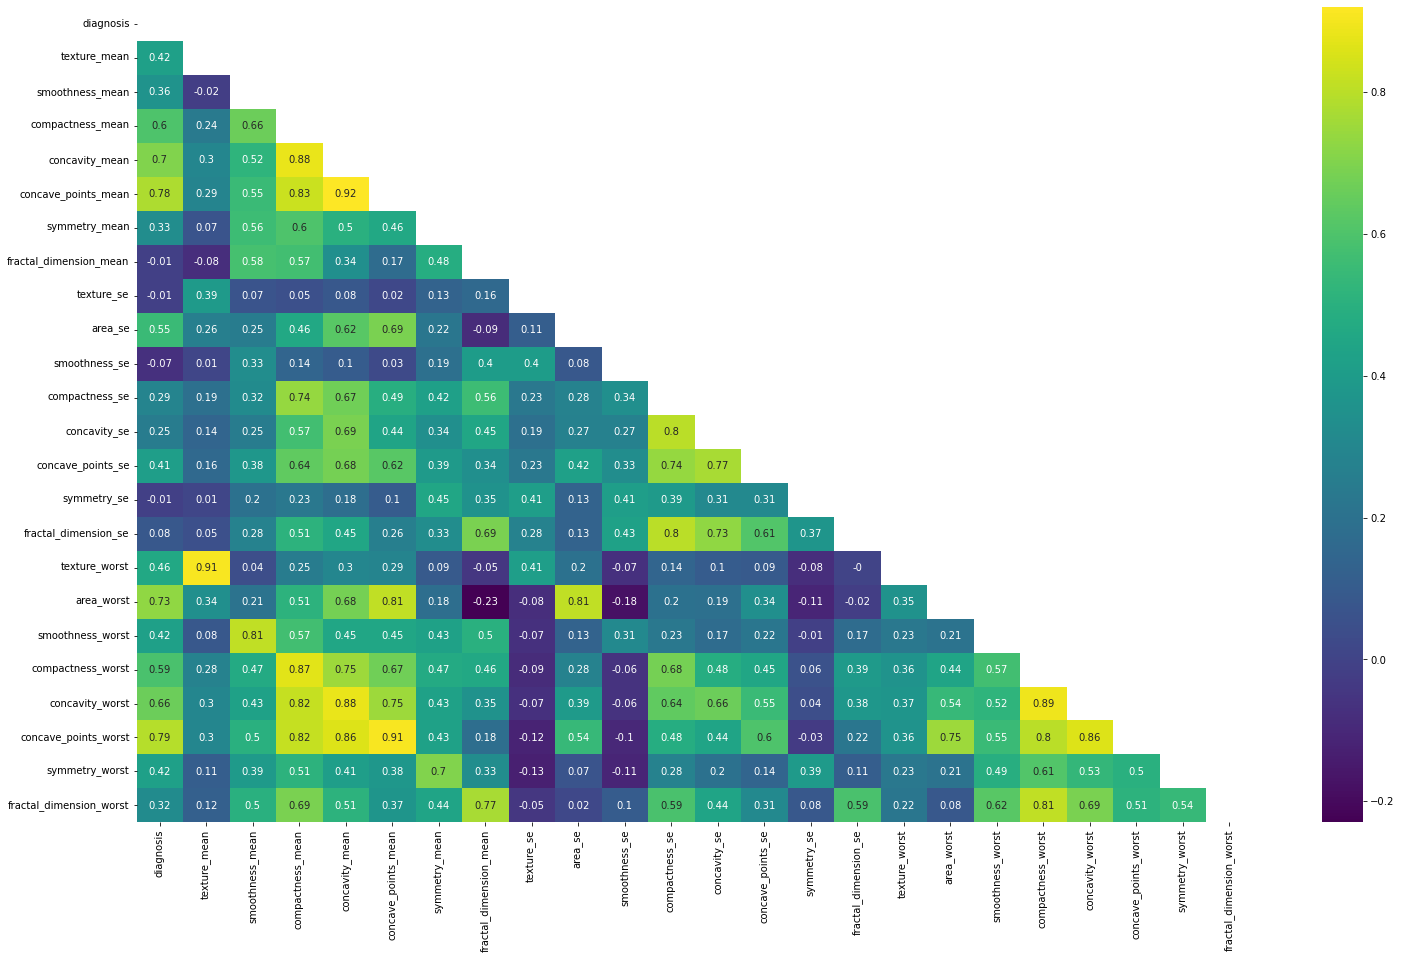

In [21]:
# visual view of correlation on numerical columns after removing highly correlated columns
plt.figure(figsize=(25,15))
mask1 = np.zeros_like(a1, dtype= bool)
mask1[np.triu_indices_from(mask1)] = True
sns.heatmap(a1, annot=True,mask = mask1,cmap="viridis")
plt.show()

Text(0.5, 1.0, 'distribution of diagnosis')

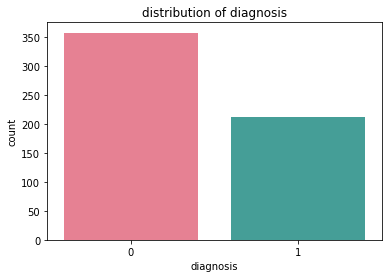

In [22]:
# Checking distribution of target column
sns.countplot(df2['diagnosis'],palette = 'husl')
plt.title("distribution of diagnosis")

 - **Checking for outliers**

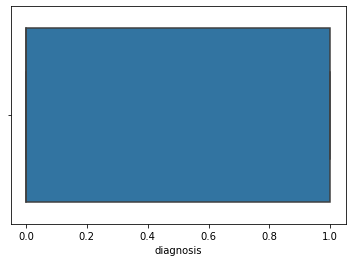

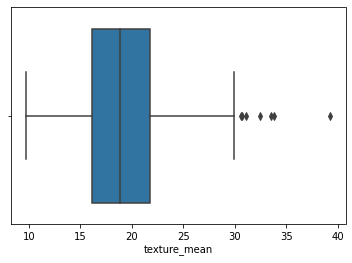

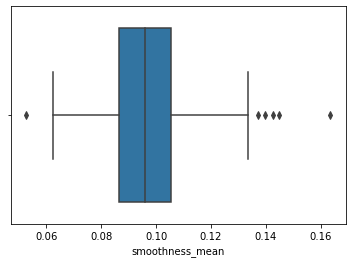

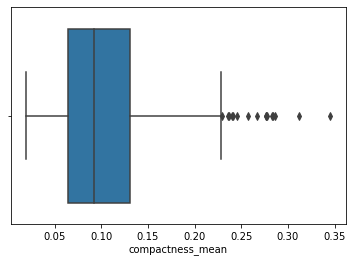

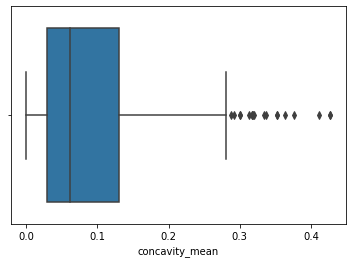

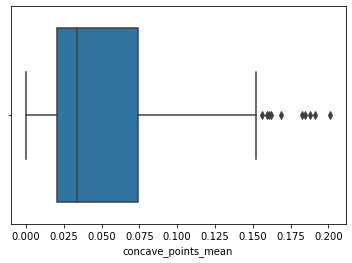

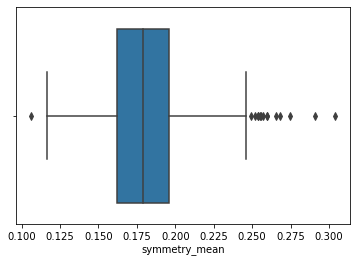

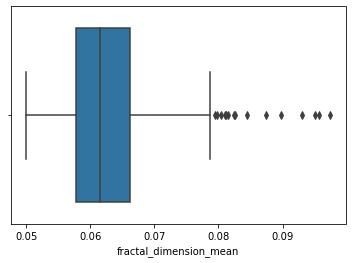

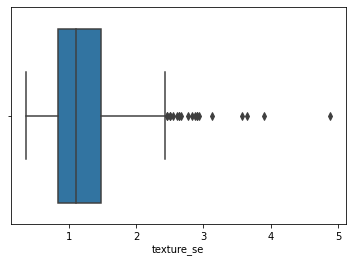

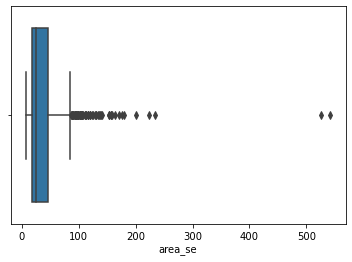

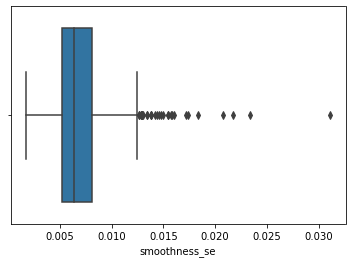

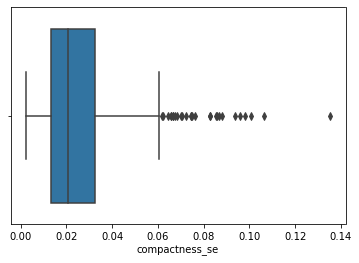

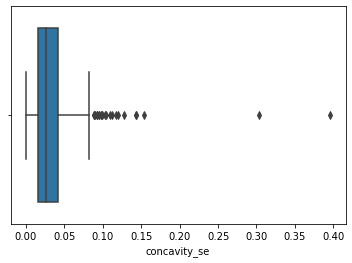

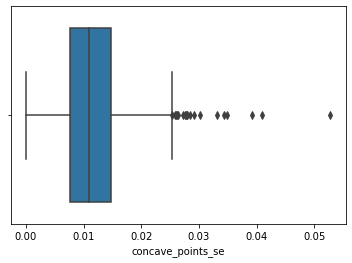

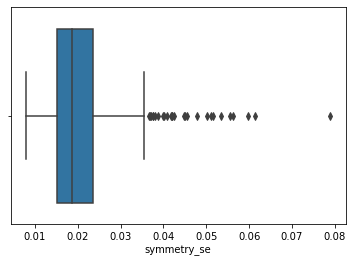

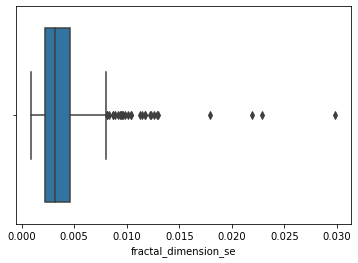

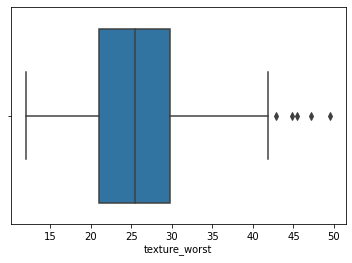

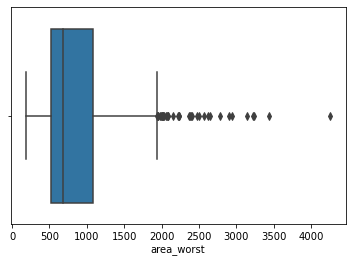

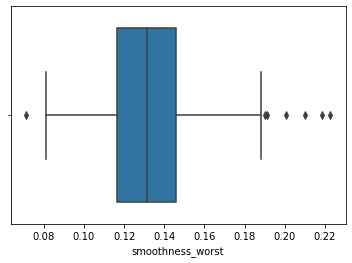

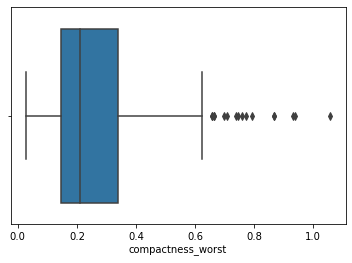

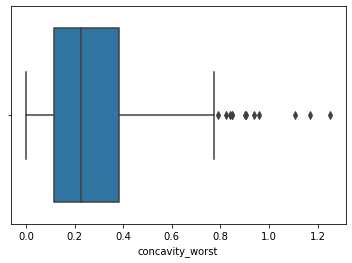

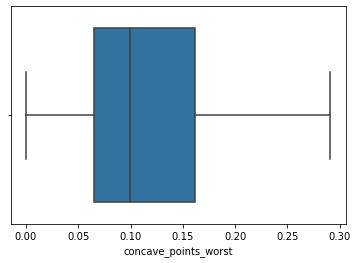

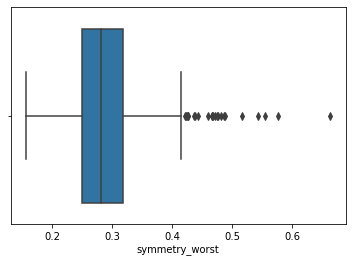

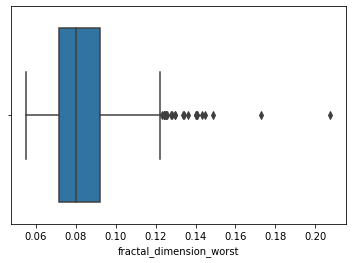

In [23]:
# Visualizing outliers
df2_num = df2[df2.select_dtypes('number').columns]
for column in df2_num.columns:
    sns.boxplot(df2_num[column])  # takes to see the distribution
    plt.show()

 - Except **target column**, all other columns shows outliers in it.
 - We use **IQR method** to increase the lower and upper limit of columns **to deal with the outliers.**

In [24]:
# Function to modify the upper and lower limit of IQR
def mod_limit(df):
        df1 = df2.copy()
        df = df._get_numeric_data()


        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]    


        for col in df.columns:
            df1[col] = df[col]

        return(df1)

df2 = mod_limit(df2)

In [25]:
# Checking data set after dealing with outliers
df2.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,0.9053,86.20,...,0.03003,0.006193,17.33,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890
1,1,17.77,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,0.7339,74.08,...,0.01389,0.003532,23.41,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902
2,1,21.25,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,0.7869,86.20,...,0.02250,0.004571,25.53,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758
3,1,20.38,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,1.1560,27.23,...,0.03596,0.008023,26.50,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301
4,1,14.34,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,0.7813,86.20,...,0.01756,0.005115,16.67,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678


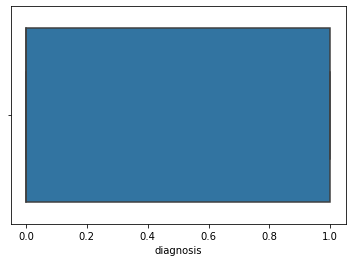

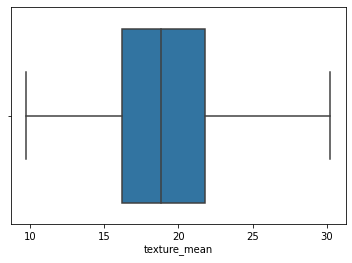

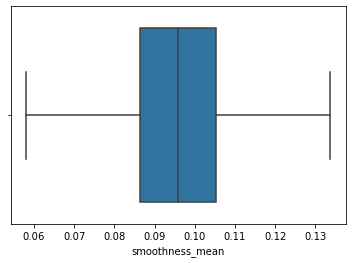

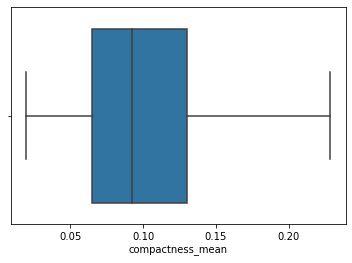

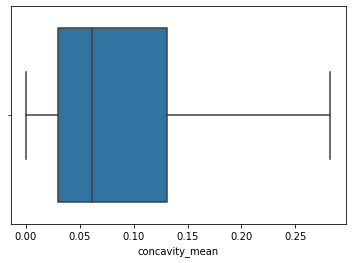

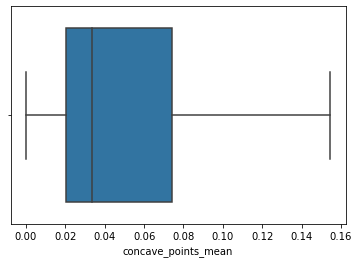

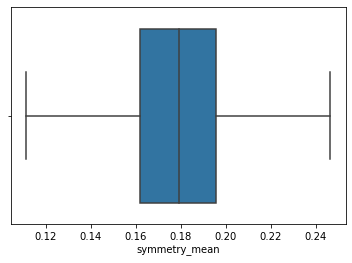

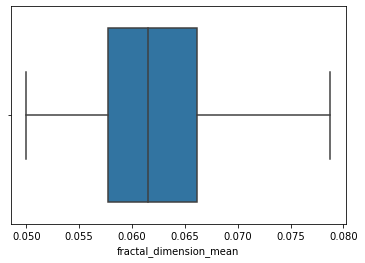

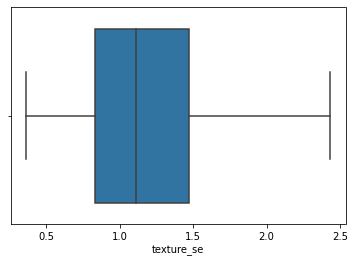

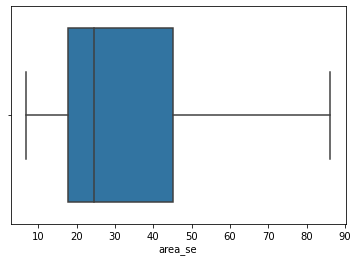

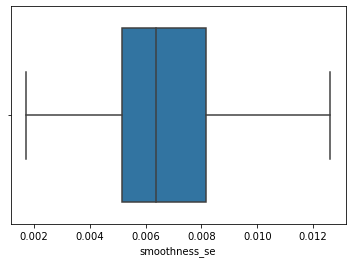

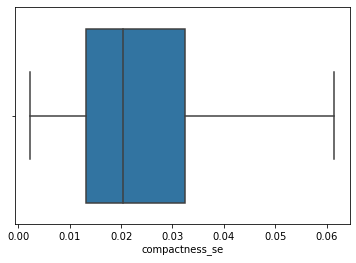

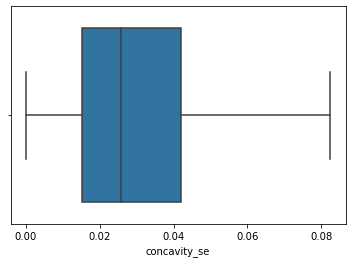

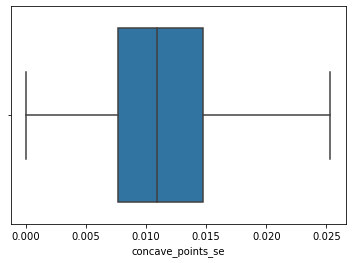

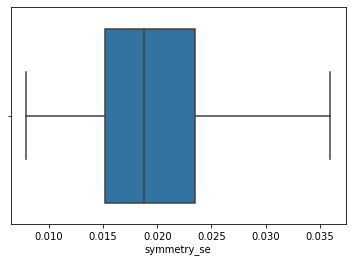

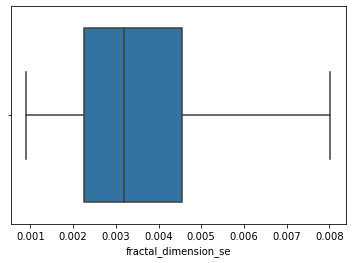

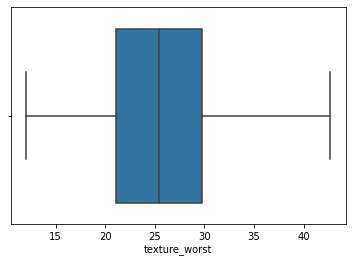

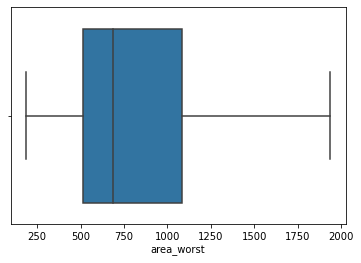

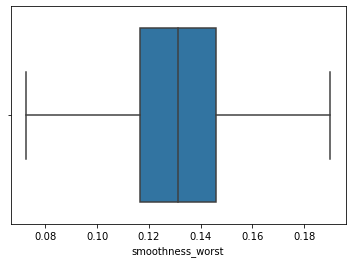

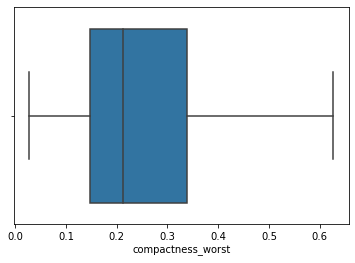

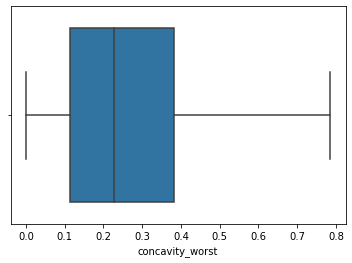

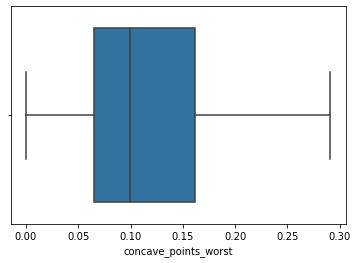

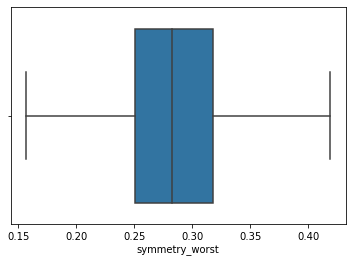

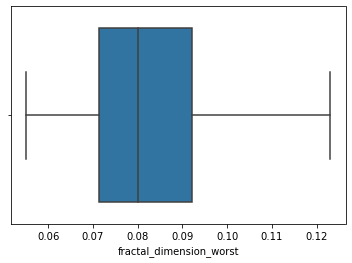

In [26]:
# Checking for columns after dealing with outliers visually.
df2_num = df2[df2.select_dtypes('number').columns]
for column in df2_num.columns:
    sns.boxplot(df2_num[column])  # takes to see the distribution
    plt.show()

 - **As you can obseve in the above plots, all columns looks good after applying mod_limit() function.**

## Building Model

 - **Defining X(independent) and y(dependent) variables**

In [27]:
X = df2.drop(['diagnosis'],axis = 1)
y = df2['diagnosis']

In [28]:
# Checking independent variables(X-values)
X.head()

,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,10.38,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,0.9053,86.20,0.006399,...,0.03003,0.006193,17.33,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890
1,17.77,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01389,0.003532,23.41,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902
2,21.25,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,0.7869,86.20,0.006150,...,0.02250,0.004571,25.53,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758
3,20.38,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,1.1560,27.23,0.009110,...,0.03596,0.008023,26.50,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301
4,14.34,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,0.7813,86.20,0.011490,...,0.01756,0.005115,16.67,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678


In [29]:
# Checking depencent variable(y-values)
y.sample(6)

251    0
18     1
177    1
200    0
180    1
340    0
Name: diagnosis, dtype: int64

 - **Spliting data into traing and testing data sets.**

In [30]:
# Importing liabrary for train-test split
from sklearn.model_selection import train_test_split

In [31]:
# Defining train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 21)

 - **Checking train-test data sets**

In [32]:
# Checking shape of X_train data
X_train.shape

(398, 23)

In [33]:
# Checking shape of y_train data
y_train.shape

(398,)

In [34]:
# Checking shape of X_test data
X_test.shape

(171, 23)

In [35]:
# Checking shape of y_test data
y_test.shape

(171,)

##### Feature Scaling

 - Will use **StandardScaler** to scale the independent(X) variables.

In [36]:
# Importing liabraries
from sklearn.preprocessing import StandardScaler

# Scaling independent variables
ss = StandardScaler()
ss = StandardScaler().fit_transform(X)

 - **Checking X values**

In [37]:
round(X.head(),2)

,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,10.38,0.12,0.23,0.28,0.15,0.24,0.08,0.91,86.20,0.01,...,0.03,0.01,17.33,1937.05,0.16,0.63,0.71,0.27,0.42,0.12
1,17.77,0.08,0.08,0.09,0.07,0.18,0.06,0.73,74.08,0.01,...,0.01,0.00,23.41,1937.05,0.12,0.19,0.24,0.19,0.28,0.09
2,21.25,0.11,0.16,0.20,0.13,0.21,0.06,0.79,86.20,0.01,...,0.02,0.00,25.53,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,20.38,0.13,0.23,0.24,0.11,0.25,0.08,1.16,27.23,0.01,...,0.04,0.01,26.50,567.70,0.19,0.63,0.69,0.26,0.42,0.12
4,14.34,0.10,0.13,0.20,0.10,0.18,0.06,0.78,86.20,0.01,...,0.02,0.01,16.67,1575.00,0.14,0.20,0.40,0.16,0.24,0.08


## Logistic Regression

In [38]:
# Importing library for Logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [39]:
# Model fitting
model1 = lr.fit(X_train, y_train)

In [40]:
# predicting logistic regression model values
y_pred1 = model1.predict(X_test)

# Checking predicted values
y_pred1

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [41]:
# Checking actual values
list(y_test.head(15))

[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [42]:
# Importing library for confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
cm

array([[105,   2],
       [  8,  56]], dtype=int64)

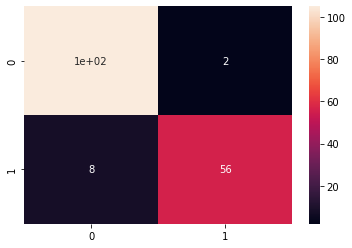

In [43]:
# Visual view of confusion matrix
sns.heatmap(cm, annot = True)
plt.savefig("h.png")

In [44]:
# Assigning values to true-positive, false-positive, false-negative and true-negative
TP = 105
FP = 2
FN = 8
TN = 56

In [45]:
# Checking accuracy based on confusion matrix
Accuracy = round((TP+TN)/(TP+TN+FP+FN),2)
Accuracy
# Accuracy tells you how many times the ML model was correct overall.

0.94

In [46]:
# Importing liabrary to check accuracy-score
from sklearn.metrics import accuracy_score
lr_accuracy = round(accuracy_score(y_test, y_pred1),2)
lr_accuracy

0.94

In [47]:
# measuring the model's ability to detect Positive samples
Recall = round(TP/(TP+FN),2)
Recall
# Recall tells you how many times the model was able to detect a specific category.

0.93

In [48]:
# checking accuracy of positive predictions
Precision = round(TP/(TP+FP),2)
Precision
# Precision is how good the model is at predicting a specific category.

0.98

In [49]:
# Checking models accuracy with precision and recall scores.
F1_score = (2*Precision*Recall)/(Precision+Recall)
F1_score
# The accuracy metric computes how many times a model made a correct prediction across the entire dataset.

0.9543455497382198

## Decision Tree

In [50]:
# Importing liabrary for DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')

In [51]:
# model fitting for DecisionTreeClassifier
model2 = dt.fit(X_train, y_train)

In [52]:
# predicting DecisionTreeClassifier model values
y_pred2 = model2.predict(X_test)

# Checking predicted values
y_pred2

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [53]:
# Checking actual values
list(y_test.head(15))

[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [54]:
# checking confusion matrix.
cm1 = confusion_matrix(y_test, y_pred2)
cm1

array([[104,   3],
       [  7,  57]], dtype=int64)

In [55]:
# Checking accuracy score
dt_accuracy = round(accuracy_score(y_test, y_pred2),2)
dt_accuracy

0.94

## Random Forest

In [56]:
# Importing liabrary for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [57]:
# Model fitting for RandomForestClassifier
model3 = rf.fit(X_train, y_train)

In [58]:
# predicting RandomForestClassifier model values
y_pred3 = model3.predict(X_test)

# Checking predicted values
y_pred3

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [59]:
# Checking actual values
list(y_test.head(15))

[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [60]:
# checking confusion matrix.
cm2 = confusion_matrix(y_test, y_pred3)
cm2

array([[106,   1],
       [  6,  58]], dtype=int64)

In [61]:
# Checking accuracy score
rf_accuracy = round(accuracy_score(y_test, y_pred3),2)
rf_accuracy

0.96

## KNN

In [62]:
# Importing liabrary for KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [63]:
# Model fitting
model4 = knn.fit(X_train, y_train)

In [64]:
# predicting KNeighborsClassifier model values
y_pred4 = model4.predict(X_test)

# Checking predicted values
y_pred4

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [65]:
# Checking actual values
list(y_test.head(15))

[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [66]:
# checking the confusion matrix.
cm4 = confusion_matrix(y_test, y_pred4)
cm4

array([[103,   4],
       [  9,  55]], dtype=int64)

In [67]:
# Checking accuracy score
knn_accuracy = round(accuracy_score(y_test, y_pred4),2)
knn_accuracy

0.92

## Classification report

In [68]:
# Importing library for Classification report
from sklearn.metrics import classification_report

In [69]:
# Printing the values of classification report for all above models
print("\033[1m"+ "Logistic regression - classification report : \n" +"\033[0m",classification_report(y_test, y_pred1))
print("\033[1m"+ "\n Decision Tree - classification report : \n" +"\033[0m",classification_report(y_test, y_pred2))
print("\033[1m"+ "\n Random Forest - classification report : \n" +"\033[0m",classification_report(y_test, y_pred3))
print("\033[1m"+ "\n KNN - classification report : \n" +"\033[0m",classification_report(y_test, y_pred4))

Logistic regression - classification report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       107
           1       0.97      0.88      0.92        64

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171


 Decision Tree - classification report : 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       107
           1       0.95      0.89      0.92        64

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171


 Random Forest - classification report : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.91      0.94        64

    accuracy                           0.96   

## Conclusion :

**Findings :**
 - In this project I examined the use of several classification techniques for breast cancer diagnosis, after reducing the raw data to a lower representation form. 
 - All ML algorithms exhibited high performance on the binary classification, as measured by the chosen metrics.
 - So for Random Forest Classifier is the best performing classifiers.
 
**Improvements :**
 - Test the algorithm on SVM
 - Tune the algorithm with GridSearchCV and Pipeline